In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('../data/df.csv')

In [3]:
df.head()

,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
0,0,1,Education,2720,0,2016-01-01 00:00:00,0.0000,0.690590,0.000000,25.0,20.0,1019.7,0.0,0.0,0,4,1
1,0,2,Education,5376,0,2016-01-01 00:00:00,0.0000,0.024090,0.000000,25.0,20.0,1019.7,0.0,0.0,0,4,1
2,0,20,Education,110272,0,2016-01-01 00:00:00,0.0000,7.215992,0.000000,25.0,20.0,1019.7,0.0,0.0,0,4,1
3,0,46,Retail,9045,0,2016-01-01 00:00:00,53.2397,54.669061,0.973854,25.0,20.0,1019.7,0.0,0.0,0,4,1
4,0,52,Education,106523,0,2016-01-01 00:00:00,0.0000,1.405271,0.000000,25.0,20.0,1019.7,0.0,0.0,0,4,1


In [4]:
len(df['primary_use'].value_counts())

16

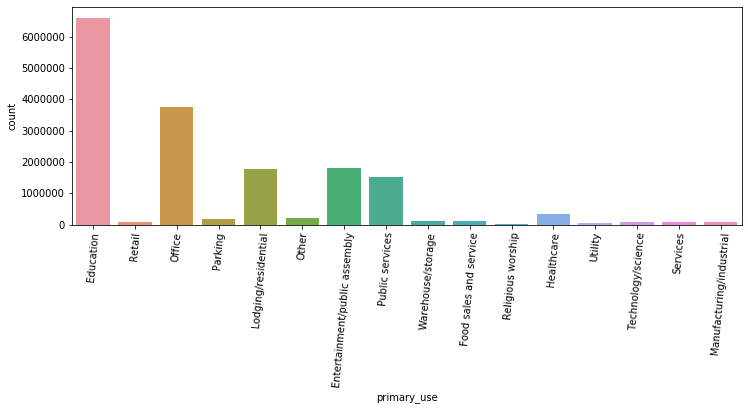

In [5]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=85)
sns.countplot(x=df['primary_use'])

Intially try top 6 and combine others

https://stackoverflow.com/questions/54653356/case-when-function-from-r-to-python

#case_when
conditions = [
    (df["age"].lt(10)),
    (df["age"].ge(10) & df["age"].lt(20)),
    (df["age"].ge(20) & df["age"].lt(30)),
    (df["age"].ge(30) & df["age"].lt(50)),
    (df["age"].ge(50)),
]
choices = ["baby", "kid", "young", "mature", "grandpa"]

df["elderly"] = np.select(conditions, choices)

conditions = [(df['primary_use']=="Education"),
              (df['primary_use']=="Office"),
              (df['primary_use']=="Lodging/residential"),
              (df['primary_use']=="Entertainment/public assembly"),
              (df['primary_use']=="Public services"),
              (df['primary_use']=="Healthcare"),
              (df['primary_use'] not in ["Education","Office","Lodging/residential","Entertainment/public assembly","Public services","Healthcare"])]



choices = ["Education","Office","Lodging/residential","Entertainment/public assembly","Public services","Healthcare","Other"]

df["test"] = np.select(conditions, choices)

In [8]:
y = ["Education","Office","Lodging/residential","Entertainment/public assembly","Public services","Healthcare","Other"]
df['new'] = df['primary_use'].apply(lambda x: "Other" if x not in y else x  )

In [9]:
df['new'].unique()

array(['Education', 'Other', 'Office', 'Lodging/residential',
       'Entertainment/public assembly', 'Public services', 'Healthcare'],
      dtype=object)

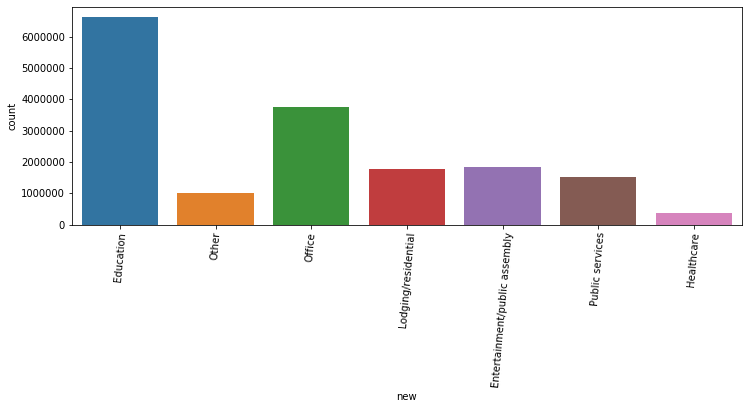

In [10]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=85)
sns.countplot(x=df['new'])